In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Capstone data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
data=pd.read_csv("insurance_part2_data.csv",encoding="latin1")
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [ ]:
df.shape

(3000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


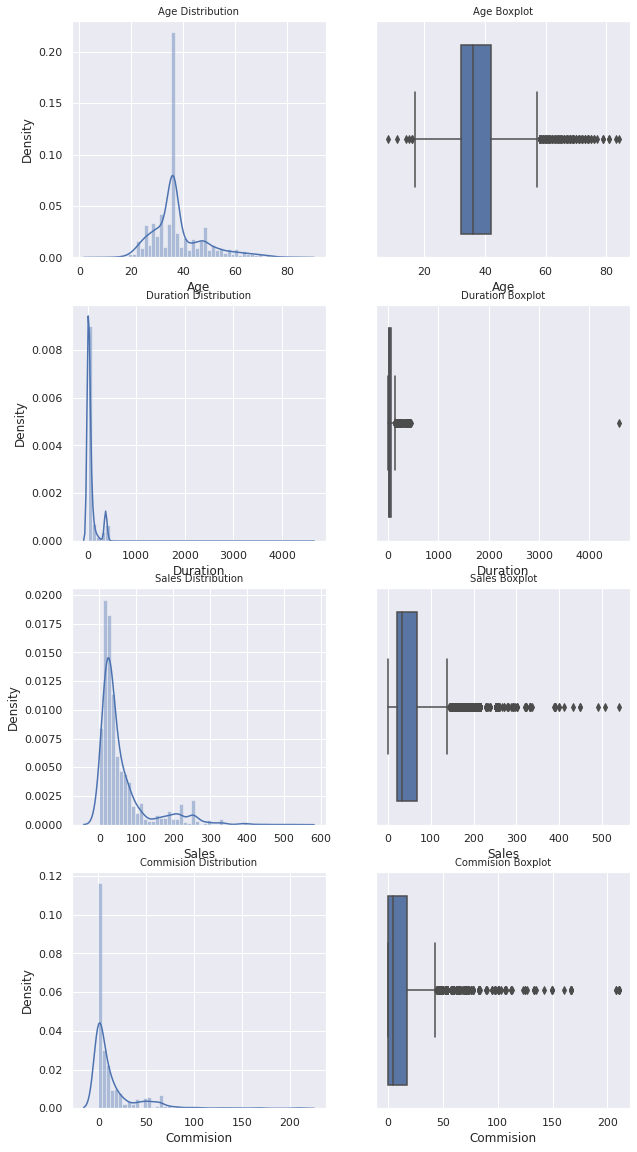

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['Age'] , ax=axes[0][0])
a.set_title("Age Distribution",fontsize=10)

a = sns.boxplot(df['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Boxplot",fontsize=10)

a = sns.distplot(df['Duration'] , ax=axes[1][0])
a.set_title("Duration Distribution",fontsize=10)

a = sns.boxplot(df['Duration'] , orient = "v" , ax=axes[1][1])
a.set_title("Duration Boxplot",fontsize=10)


a = sns.distplot(df['Sales'] , ax=axes[2][0])
a.set_title("Sales Distribution",fontsize=10)

a = sns.boxplot(df['Sales'] , orient = "v" , ax=axes[2][1])
a.set_title("Sales Boxplot",fontsize=10)


a = sns.distplot(df['Commision'] , ax=axes[3][0])
a.set_title("Commision Distribution",fontsize=10)

a = sns.boxplot(df['Commision'] , orient = "v" , ax=axes[3][1])
a.set_title("Commision Boxplot",fontsize=10)

plt.show()

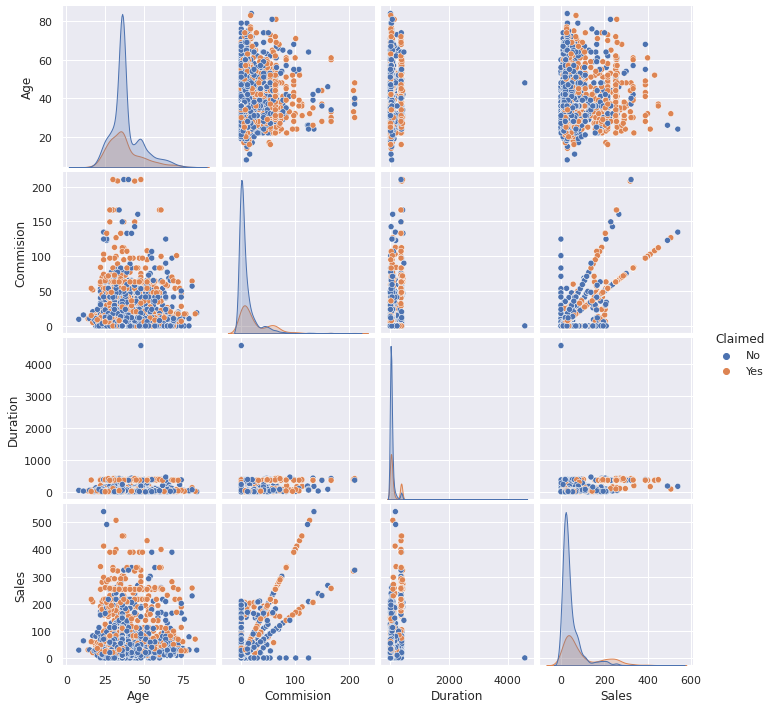

In [ ]:
sns.pairplot(df,hue="Claimed")

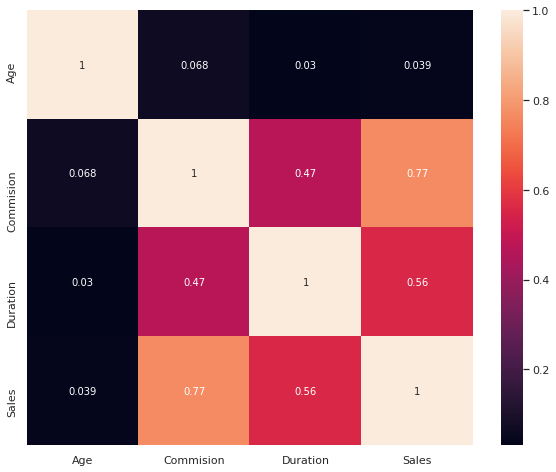

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

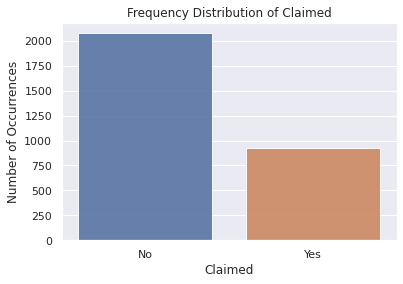

No     2076
Yes     924
Name: Claimed, dtype: int64


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
Claimed_count = df['Claimed'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Claimed_count.index,Claimed_count.values, alpha=0.9)
plt.title('Frequency Distribution of Claimed')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Claimed', fontsize=12)
plt.show()
print(df['Claimed'].value_counts())

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lr,ur=remove_outlier(df["Age"])
df["Age"]=np.where(df["Age"]>ur,ur,df["Age"])
df["Age"]=np.where(df["Age"]<lr,lr,df["Age"])
lr,ur=remove_outlier(df["Commision"])
df["Commision"]=np.where(df["Commision"]>ur,ur,df["Commision"])
df["Commision"]=np.where(df["Commision"]<lr,lr,df["Commision"])
lr,ur=remove_outlier(df["Duration"])
df["Duration"]=np.where(df["Duration"]>ur,ur,df["Duration"])
df["Duration"]=np.where(df["Duration"]<lr,lr,df["Duration"])
lr,ur=remove_outlier(df["Sales"])
df["Sales"]=np.where(df["Sales"]>ur,ur,df["Sales"])
df["Sales"]=np.where(df["Sales"]<lr,lr,df["Sales"])


In [ ]:
df['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [ ]:
df['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [ ]:
df['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [ ]:
df['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [ ]:
df['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [ ]:
df['Product Name']=df['Product Name'].astype('category')
df['Claimed']=df['Claimed'].astype('category')
df['Product Name_cat']=df['Product Name'].cat.codes
df['Claimed_cat']=df['Claimed'].cat.codes
df=df.drop('Claimed',axis=1)

In [ ]:
df1= pd.get_dummies(df,drop_first=True)
df1.head(2)

,Age,Commision,Duration,Sales,Product Name_cat,Claimed_cat,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Travel Agency,Channel_Online,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_Americas,Destination_EUROPE
0,48.0,0.7,7.0,2.51,2,0,0,0,0,0,1,0,1,0,0,0,0
1,36.0,0.0,34.0,20.00,2,0,0,1,0,1,1,0,1,0,0,0,0


Splitting the data for model building

In [ ]:
X = df1.drop("Claimed_cat" , axis=1)

y = df1.Claimed_cat

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10,stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2100, 16)
(900, 16)
(2100,)
(900,)


CART MODEL

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
y_predict = dt_model.predict(X_test)

HYPERPARAMETER TUNINNG CART

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid ={'criterion':['gini', 'entropy'],
         'max_depth':[5,6,7,9,10,11,13,15,16],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
         "min_samples_leaf":[2,3,4,5,6,7,8,9,10],
    #'max_depth': [7, 10],
    'max_features': [4, 6],
    #'min_samples_leaf': [50, 100],
    #'min_samples_split': [150, 300],

}

DT = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=DT, param_grid = param_grid, cv = 5,verbose=1,n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 13322 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 14580 out of 14580 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 7}

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion='gini',max_depth= 6,min_samples_leaf=8,min_samples_split=7,max_features=4)
reg_dt_model.fit(X_train,y_train)
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

Performance Metris CART

In [ ]:
## ACCURACY SCORE
print(reg_dt_model.score(X_train,y_train))
print(reg_dt_model.score(X_test,y_test))

0.7933333333333333
0.7522222222222222


In [ ]:
##Confusion Matrix Decision Tree
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.confusion_matrix(y_train, ytrain_predict))

[[551  72]
 [151 126]]
[[1338  115]
 [ 319  328]]


In [ ]:
##Classification report test
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       623
           1       0.64      0.45      0.53       277

    accuracy                           0.75       900
   macro avg       0.71      0.67      0.68       900
weighted avg       0.74      0.75      0.74       900



In [ ]:
## Classifcation report train
print(metrics.classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1453
           1       0.74      0.51      0.60       647

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.79      0.79      0.78      2100



In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
#cart test perormance metrics
cart_test_recall=recall_score(y_test, ytest_predict,average='macro')
cart_test_precision=precision_score(y_test, ytest_predict,average='macro')
cart_test_f1=f1_score(y_test, ytest_predict,average='macro')
cart_test_accuracy=accuracy_score(y_test, ytest_predict)
#cart train perormance metrics
cart_train_precision=precision_score(y_train, ytrain_predict,average='macro')
cart_train_recall=recall_score(y_train, ytrain_predict,average='macro')
cart_train_f1=f1_score(y_train, ytrain_predict,average='macro')
cart_train_accuracy=accuracy_score(y_train, ytrain_predict)

AUC and ROC Train
AUC: 0.844


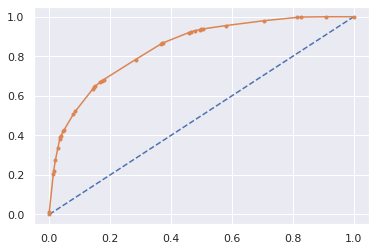

In [ ]:
# AUC and ROC for the train data

# predict probabilities
print('AUC and ROC Train')
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
# show the plot
plt.show()

AUC and ROC Test
AUC: 0.783


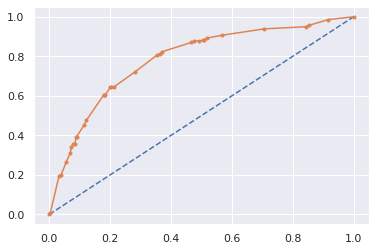

In [ ]:
# AUC and ROC for the test data
print('AUC and ROC Test')
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr,cart_test_tpr, marker='.')
# show the plot
plt.show()

RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train,y_train)

In [ ]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search2= GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5,n_jobs=-1,verbose=1)

In [ ]:
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search2.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [ ]:
rfcl_model = RandomForestClassifier(max_depth= 7,min_samples_leaf=50,min_samples_split=150,max_features=6,n_estimators=301)
rfcl_model.fit(X_train,y_train)
ytrain_predict2 = rfcl_model.predict(X_train)
ytest_predict2 = rfcl_model.predict(X_test)

In [ ]:
## Accuracy score train and test)
print(rfcl_model.score(X_test,y_test))
print(rfcl_model.score(X_train,y_train))

0.7633333333333333
0.7876190476190477


In [ ]:
## Confusion Matrix
print(metrics.confusion_matrix(y_test, ytest_predict2))
print(metrics.confusion_matrix(y_train, ytrain_predict2))

[[548  75]
 [138 139]]
[[1327  126]
 [ 320  327]]


In [ ]:
## Classificationn report train
print(metrics.classification_report(y_train, ytrain_predict2))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1453
           1       0.72      0.51      0.59       647

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [ ]:
## Classification report test
print(metrics.classification_report(y_test, ytest_predict2))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       623
           1       0.65      0.50      0.57       277

    accuracy                           0.76       900
   macro avg       0.72      0.69      0.70       900
weighted avg       0.75      0.76      0.75       900



In [ ]:
#RNN train perormance metrics
rnn_train_precision=precision_score(y_train, ytrain_predict2,average='macro')
rnn_train_recall=recall_score(y_train, ytrain_predict2,average='macro')
rnn_train_f1=f1_score(y_train, ytrain_predict2,average='macro')
rnn_train_accuracy=accuracy_score(y_train, ytrain_predict2)
#RNN Test performance metrics
rnn_test_recall=recall_score(y_test, ytest_predict2,average='macro')
rnn_test_precision=precision_score(y_test, ytest_predict2,average='macro')
rnn_test_f1=f1_score(y_test, ytest_predict2,average='macro')
rnn_test_accuracy=accuracy_score(y_test, ytest_predict2)

AUC and ROC Train
AUC: 0.837


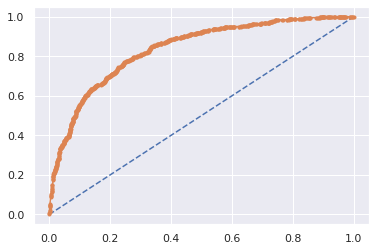

In [ ]:
# AUC and ROC for the train data
print('AUC and ROC Train')
# predict probabilities
probs = rfcl_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rnn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rnn_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rnn_train_fpr, rnn_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rnn_train_fpr, rnn_train_tpr, marker='.')
# show the plot
plt.show()

AUC and ROC Test
AUC: 0.804


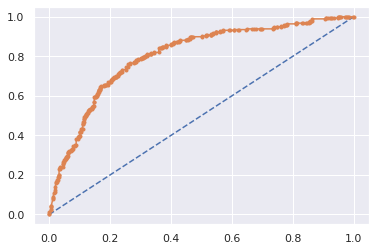

In [ ]:
# AUC and ROC for the test data
print('AUC and ROC Test')
# predict probabilities
probs = rfcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rnn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rnn_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rnn_test_fpr, rnn_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rnn_test_fpr, rnn_test_tpr, marker='.')
# show the plot
plt.show()

ANN MODEL

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=10, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
clf.fit(X_train_scaled,y_train)

Iteration 1, loss = 1.22556141
Iteration 2, loss = 1.13097766
Iteration 3, loss = 1.02071105
Iteration 4, loss = 0.92423113
Iteration 5, loss = 0.84326540
Iteration 6, loss = 0.78075569
Iteration 7, loss = 0.73278118
Iteration 8, loss = 0.69526804
Iteration 9, loss = 0.66563210
Iteration 10, loss = 0.64204879
Iteration 11, loss = 0.62354464
Iteration 12, loss = 0.60825137
Iteration 13, loss = 0.59612261
Iteration 14, loss = 0.58558425
Iteration 15, loss = 0.57689195
Iteration 16, loss = 0.56961628
Iteration 17, loss = 0.56304053
Iteration 18, loss = 0.55749462
Iteration 19, loss = 0.55252437
Iteration 20, loss = 0.54817515
Iteration 21, loss = 0.54419504
Iteration 22, loss = 0.54065384
Iteration 23, loss = 0.53738049
Iteration 24, loss = 0.53449067
Iteration 25, loss = 0.53165283
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=0.01, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [1,3,5,7,10],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'tol': [0.0001, 0.001,0.01],
    'max_iter': [200,1000,5000]
}

clf = MLPClassifier(random_state=10)

grid_search3 = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5,verbose=1,n_jobs=-1)

In [ ]:
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...e,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['

In [ ]:
grid_search3.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 7,
 'max_iter': 200,
 'solver': 'adam',
 'tol': 0.0001}

In [ ]:
clf_model = MLPClassifier(activation= 'logistic',hidden_layer_sizes=7,max_iter=200,solver= 'adam',tol= 0.0001)
clf_model.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
ytrain_predict3 = clf_model.predict(X_train_scaled)
ytest_predict3 = clf_model.predict(X_test_scaled)

In [ ]:
##Accuracy score
print(clf_model.score(X_test_scaled,y_test))
print(clf_model.score(X_train_scaled,y_train))

0.6622222222222223
0.6971428571428572


In [ ]:
## Confusion Matrix
print(metrics.confusion_matrix(y_test, ytest_predict3))
print(metrics.confusion_matrix(y_train, ytrain_predict3))

[[405 218]
 [ 86 191]]
[[1008  445]
 [ 191  456]]


In [ ]:
## Classification report train
print(metrics.classification_report(y_train, ytrain_predict3))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1453
           1       0.51      0.70      0.59       647

    accuracy                           0.70      2100
   macro avg       0.67      0.70      0.67      2100
weighted avg       0.74      0.70      0.71      2100



In [ ]:
## Classification report  test
print(metrics.classification_report(y_test, ytest_predict3))

              precision    recall  f1-score   support

           0       0.82      0.65      0.73       623
           1       0.47      0.69      0.56       277

    accuracy                           0.66       900
   macro avg       0.65      0.67      0.64       900
weighted avg       0.71      0.66      0.67       900



In [ ]:
## 
ann_test_recall=recall_score(y_test, ytest_predict3,average='macro')
ann_test_precision=precision_score(y_test, ytest_predict3,average='macro')
ann_test_f1=f1_score(y_test, ytest_predict3,average='macro')
ann_test_accuracy=accuracy_score(y_test, ytest_predict3)
##
ann_train_precision=precision_score(y_train, ytrain_predict3,average='macro')
ann_train_recall=recall_score(y_train, ytrain_predict3,average='macro')
ann_train_f1=f1_score(y_train, ytrain_predict3,average='macro')
ann_train_accuracy=accuracy_score(y_train, ytrain_predict3)


AUC and ROC Train
AUC: 0.752


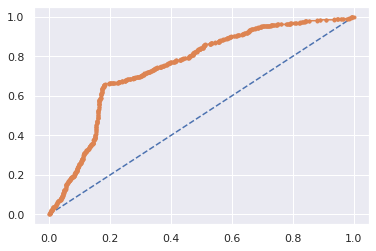

In [ ]:
# predict probabilities
print('AUC and ROC Train')
probs = clf_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ANN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ANN_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ann_train_fpr,ann_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr, marker='.')
# show the plot
plt.show()

AUC and ROC Test
AUC: 0.727


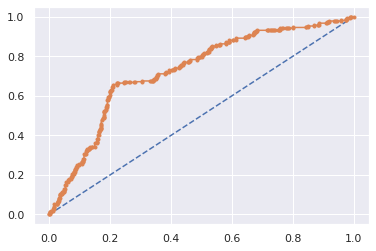

In [ ]:
# predict probabilities
print('AUC and ROC Test')
probs = clf_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ANN_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ANN_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ann_test_fpr,ann_test_tpr,thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr,ann_test_tpr, marker='.')
# show the plot
plt.show()

MODEL COMPARISON 

In [ ]:
models=[reg_dt_model,clf_model,rfcl_model]
models_names={reg_dt_model:'DecisionTreeClassifier',clf_model:'ANN',rfcl_model:'RandomForestClassifier'}
for i in range(0, len(models)):
    if models[i]==clf_model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_train, models[i].predict(X_train_scaled)),1)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test_scaled)),1))  )
    elif models[i]==reg_dt_model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_train, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test)),2))  )
    else:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_train, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test)),2))  ) 

Accuracy Score for Train set for DecisionTreeClassifier is 0.79
Accuracy Score for Test set for DecisionTreeClassifier is 0.75
Accuracy Score for Train set for ANN is 0.7
Accuracy Score for Test set for ANN is 0.7
Accuracy Score for Train set for RandomForestClassifier is 0.79
Accuracy Score for Test set for RandomForestClassifier is 0.76


### Confusion Matrix for all Models - Train and Test


Confusion Matrix Train


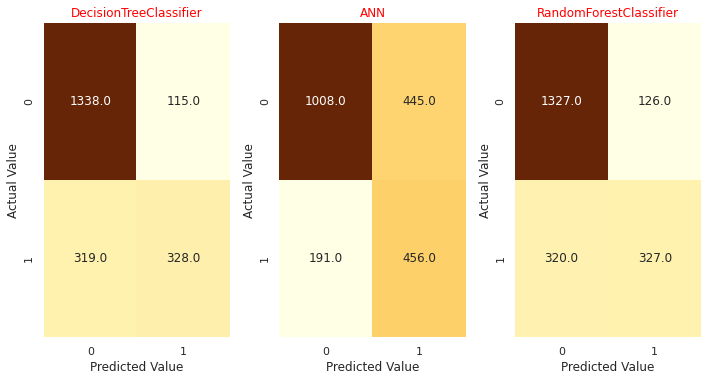

In [ ]:
print('Confusion Matrix Train')
models=[reg_dt_model,clf_model,rfcl_model]
models_names={reg_dt_model:'DecisionTreeClassifier',clf_model:'ANN',rfcl_model:'RandomForestClassifier'}
fig=plt.figure(figsize=(10,10))
for i in range(0, len(models)):
    ax=fig.add_subplot(2,3,i+1)
    if models[i]==clf_model: 
        sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train_scaled)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    elif models[i]==rfcl_model : 
        sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else: 
        sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()

Confusion Matrix Test


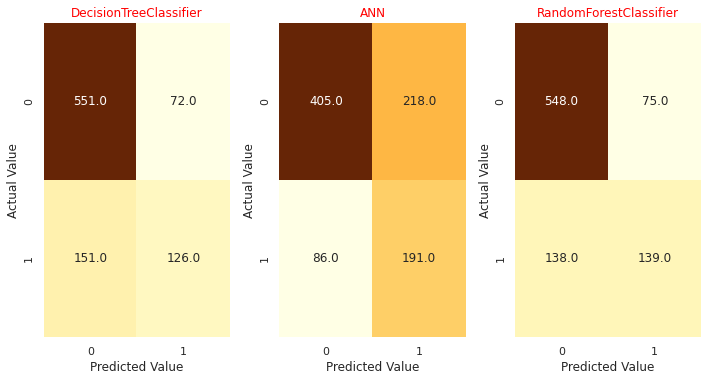

In [ ]:
print('Confusion Matrix Test')
models=[reg_dt_model,clf_model,rfcl_model]
models_names={reg_dt_model:'DecisionTreeClassifier',clf_model:'ANN',rfcl_model:'RandomForestClassifier'}
fig=plt.figure(figsize=(10,10))
for i in range(0, len(models)):
    ax=fig.add_subplot(2,3,i+1)
    if models[i]==clf_model: 
        sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test_scaled)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    elif models[i]==rfcl_model : 
        sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else: 
        sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()


### Classification report for all Models - Train and Test

In [ ]:
index=['Accuracy','AUC','Precision','Recall','F1 Score']
data=pd.DataFrame({'ANN Test':[ann_test_accuracy,ANN_auc,ann_test_precision,ann_test_recall,ann_test_f1],
                  'ANN Train':[ann_train_accuracy,ANN_train_auc,ann_train_precision,ann_train_recall,ann_train_f1],
                  'RNN Test':[rnn_test_accuracy,rnn_test_auc,ann_test_precision,rnn_test_recall,rnn_test_f1],
                  'RNN Train':[rnn_train_accuracy,rnn_train_auc,ann_train_precision,rnn_train_recall,rnn_train_f1],
                  'CART Test':[cart_test_accuracy,cart_test_auc,cart_test_precision,cart_test_recall,cart_test_f1],
                  'CART Train':[cart_train_accuracy,cart_train_auc,cart_train_precision,cart_train_recall,cart_train_f1]},index=index)
round(data,2)

,ANN Test,ANN Train,RNN Test,RNN Train,CART Test,CART Train
Accuracy,0.66,0.70,0.76,0.79,0.75,0.79
AUC,0.73,0.75,0.80,0.84,0.78,0.84
Precision,0.65,0.67,0.65,0.67,0.71,0.77
Recall,0.67,0.70,0.69,0.71,0.67,0.71
F1 Score,0.64,0.67,0.70,0.73,0.68,0.73


### ROC for all Models - Train and Test

AUC and ROC Train


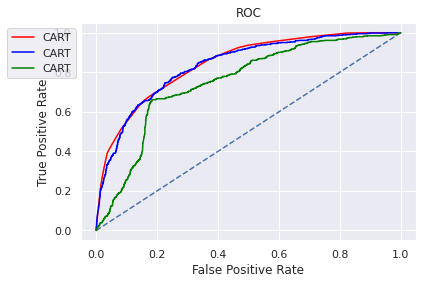

In [ ]:
print('AUC and ROC Train')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,color='red',label='CART')
plt.plot(rnn_train_fpr,rnn_train_tpr,color='blue',label='CART')
plt.plot(ann_train_fpr,ann_train_tpr,color='green',label='CART')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.),loc='best')

AUC and ROC Test


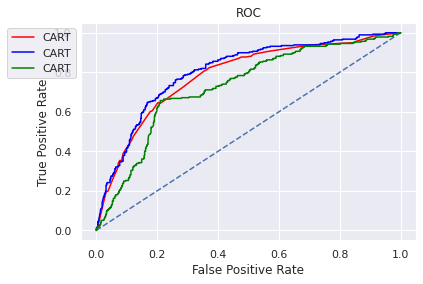

In [ ]:
print('AUC and ROC Test')
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,color='red',label='CART')
plt.plot(rnn_test_fpr,rnn_test_tpr,color='blue',label='CART')
plt.plot(ann_test_fpr,ann_test_tpr,color='green',label='CART')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.),loc='best')